In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


#### Removing unwanted columns

In [4]:
df.drop(['bpay_biller_code', 'merchant_code', 'card_present_flag', 'merchant_id',
        'merchant_suburb', 'merchant_state', 'merchant_long_lat'],axis = 1, inplace=True)

In [5]:
df.head()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit


In [8]:
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [16]:
df[df.txn_description == 'PAY/SALARY'].head()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement
50,posted,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,Isaiah,8342.11,2018-08-01,M,23,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,credit
61,posted,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,Marissa,2040.58,2018-08-01,F,23,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,credit
64,posted,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,Eric,3158.51,2018-08-01,M,22,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,credit
68,posted,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,Jeffrey,2517.66,2018-08-01,M,24,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,credit
70,posted,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,Kristin,2271.79,2018-08-01,F,43,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,credit


In [30]:
customers = list(df.customer_id.unique())

In [45]:
lst = []
for cust in customers:
    lst.append({'customer_id': cust, 'salary': df.loc[df['customer_id'] == cust, 'amount'].sum()} )

In [46]:
df_cust = pd.DataFrame(lst)

In [50]:
df_cust.head()

,customer_id,salary
0,CUS-2487424745,26211.59
1,CUS-2142601169,23696.45
2,CUS-1614226872,19286.44
3,CUS-2688605418,20550.24
4,CUS-4123612273,22312.12


#### This dataset have 3 months salary for every customer
#### Converting 3 months salary to annual

In [51]:
df_cust['salary'] = df_cust['salary'] * 4

In [66]:
# Number of purchases by each customer in 3 months
purchases =  dict(df[(df.txn_description == 'SALES-POS') | (df.txn_description == 'POS')].groupby('customer_id')['customer_id'].count())

In [67]:
# Average amount of purchase by each customer 
avg_trans = dict(df[(df.txn_description == 'SALES-POS') | (df.txn_description == 'POS')].groupby('customer_id')['amount'].mean())

In [68]:
# Creating columns from dictionaries
df_cust['purchases'] = df['customer_id'].map(purchases)
df_cust['avg_trans'] = df['customer_id'].map(avg_trans)

In [73]:
# Multiplying purchases column to 4 to convert it to annual number of purchases
df_cust['purchases'] = df_cust['purchases'] * 4

In [74]:
df_cust.head()

,customer_id,salary,purchases,avg_trans
0,CUS-2487424745,104846.36,2124,18.491921
1,CUS-2142601169,94785.80,2124,18.491921
2,CUS-1614226872,77145.76,1104,35.093333
3,CUS-2688605418,82200.96,880,31.114864
4,CUS-4123612273,89248.48,2124,18.491921


### Getting Age and Gender from original dataset

In [87]:
final_df = pd.merge(df.drop_duplicates(subset=['customer_id'], keep='last')[['customer_id', 'age', 'gender']], df_cust, on = 'customer_id', how = 'left')

In [89]:
final_df.head()

,customer_id,age,gender,salary,purchases,avg_trans
0,CUS-3431016847,22,M,61299.44,652,30.310491
1,CUS-1233833708,44,M,41542.16,440,36.298182
2,CUS-2977593493,50,F,54090.84,448,31.418125
3,CUS-1220154422,25,F,82384.44,308,51.412597
4,CUS-1646183815,78,M,43381.00,808,28.315693


In [93]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  100 non-null    object 
 1   age          100 non-null    int64  
 2   gender       100 non-null    object 
 3   salary       100 non-null    float64
 4   purchases    100 non-null    int64  
 5   avg_trans    100 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 5.5+ KB


In [94]:
final_df.corr()

,age,salary,purchases,avg_trans
age,1.000000,-0.058265,-0.023502,0.065434
salary,-0.058265,1.000000,-0.083575,0.079966
purchases,-0.023502,-0.083575,1.000000,-0.392328
avg_trans,0.065434,0.079966,-0.392328,1.000000


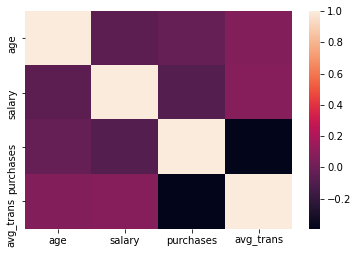

In [95]:
corr = final_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)